<a href="https://colab.research.google.com/github/2303A51553/Natural-language-process/blob/main/2303A51553_b09_nlp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas spacy

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Consumer_Complaints.csv')

In [ ]:
print(df['Consumer Complaint'])

0                                                       NaN
1         I have outdated information on my credit repor...
2         I purchased a new car on XXXX XXXX. The car de...
3                                                       NaN
4                                                       NaN
                                ...                        
470143                                                  NaN
470144    I want to report two banks to the federal gove...
470145    XXXX sent a false loan verification over to XX...
470146                                                  NaN
470147                                                  NaN
Name: Consumer Complaint, Length: 470148, dtype: object


In [ ]:
text=df['Consumer Complaint'].iloc[0:25]
print("First 25 complaint texts:\n",text)

First 25 complaint texts:
 0                                                   NaN
1     I have outdated information on my credit repor...
2     I purchased a new car on XXXX XXXX. The car de...
3                                                   NaN
4                                                   NaN
5                                                   NaN
6                                                   NaN
7     An account on my credit report has a mistaken ...
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12    This company refuses to provide me verificatio...
13                                                  NaN
14                                                  NaN
15                                                  NaN
16    This complaint is in regards to Square Two Fin...
17                   

Number of characters and words per text

In [ ]:
print("Number of words:", len(str(df['Consumer Complaint'].iloc[1]).split()))

Number of words: 34


In [ ]:
print("Number of characters:", len(str(df['Consumer Complaint'].iloc[1])))

Number of characters: 200


In [ ]:
d=df['Consumer Complaint']
print(d)

0                                                       NaN
1         I have outdated information on my credit repor...
2         I purchased a new car on XXXX XXXX. The car de...
3                                                       NaN
4                                                       NaN
                                ...                        
470143                                                  NaN
470144    I want to report two banks to the federal gove...
470145    XXXX sent a false loan verification over to XX...
470146                                                  NaN
470147                                                  NaN
Name: Consumer Complaint, Length: 470148, dtype: object


In [ ]:
dd=d.iloc[1]
print(dd)

I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements


spaCy

In [ ]:
import spacy

Tokenization

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
print("\n Sentence Tokenization:")
for s in doc.sents:
  print(s.text)


 Sentence Tokenization:
I have outdated information on my credit report that I have previously disputed that has yet to be removed this information is more then seven years old and does not meet credit reporting requirements


In [ ]:
print("\n Word Tokenization:")
for w in doc:
  print(w.text)


 Word Tokenization:
I
have
outdated
information
on
my
credit
report
that
I
have
previously
disputed
that
has
yet
to
be
removed
this
information
is
more
then
seven
years
old
and
does
not
meet
credit
reporting
requirements


In [ ]:
doc=nlp(dd)
for i in doc:
    print(i,"=",i.pos_)

I = PRON
have = VERB
outdated = VERB
information = NOUN
on = ADP
my = PRON
credit = NOUN
report = NOUN
that = PRON
I = PRON
have = AUX
previously = ADV
disputed = VERB
that = PRON
has = VERB
yet = ADV
to = PART
be = AUX
removed = VERB
this = DET
information = NOUN
is = AUX
more = ADV
then = ADV
seven = NUM
years = NOUN
old = ADJ
and = CCONJ
does = AUX
not = PART
meet = VERB
credit = NOUN
reporting = NOUN
requirements = NOUN


In [ ]:
pos_counts = {
"NOUN": 0,
"PRON": 0,
"VERB": 0,
"ADV": 0
}
for i in doc:
      if i.pos_ in pos_counts:
              pos_counts[i.pos_] += 1
for pos, count in pos_counts.items():
      print(f"Number of {pos.lower()}s: {count}")

Number of nouns: 8
Number of prons: 5
Number of verbs: 6
Number of advs: 4


In [ ]:
print("Verbs and Adjectives in the text:")
for i in doc:
    if i.pos_ in ["VERB", "ADJ"]:
        print(i.text, "=", i.pos_)

Verbs and Adjectives in the text:
have = VERB
outdated = VERB
disputed = VERB
has = VERB
removed = VERB
old = ADJ
meet = VERB


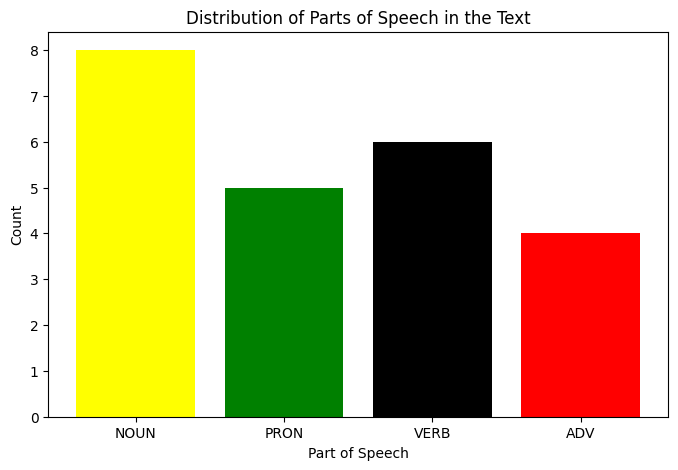

In [ ]:
import matplotlib.pyplot as plt
pos_labels = list(pos_counts.keys())
counts = list(pos_counts.values())

plt.figure(figsize=(8,5))
plt.bar(pos_labels, counts, color=['yellow','green','black','red'])
plt.xlabel("Part of Speech")
plt.ylabel("Count")
plt.title("Distribution of Parts of Speech in the Text")
plt.show()

In [ ]:
import re

In [ ]:
given="My phone number is 1234567890 and my email is test@domain.com. Visit https://example.com for more info!!. HELLO!!! This is SOOOOO exciting :)). Contact us at info@company.org or call +919876543210. Python's regex is very useful!!!  #Coding #Fun"

In [ ]:
regex='\d+'
match=re.findall(regex,given)
print(match)

['1234567890', '919876543210']


In [ ]:
cleaned_text=re.sub(r'\d+','',given)
cleaned_text=re.sub(r'\W+@\W+\.\W+','',cleaned_text)
cleaned_text=re.sub(r'https?://\W+', '', cleaned_text)
cleaned_text=re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_text)

print("Cleaned text:", cleaned_text)

Cleaned text: My phone number is  and my email is testdomaincom Visit httpsexamplecom for more info HELLO This is SOOOOO exciting  Contact us at infocompanyorg or call  Pythons regex is very useful  Coding Fun
